# STOCK MARKET PREDECTION AND FORCASTING USING STCKED LSTM

In [ ]:
# Using Keras and Tensorflow >2.0

Steps
1. We will collect the Stock Data--AAPL
2. Preprocess the Data- Train and Test
3. Create An Stacked LsTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

In [ ]:
!pip install yfinance

In [ ]:
#Data Collection
import pandas as pd
import yfinance as yf

In [ ]:
!pip install bsedata

In [ ]:
from bsedata.bse import BSE
b = BSE()

In [ ]:
security_code = ['500325','532540','500180','500209','500696','532174','500010','500034','500112','500247']

In [ ]:
security_id = []
for code in security_code:
  security_id.append(b.getQuote(code)['securityID'])

In [ ]:
security_id

['RELIANCE',
 'TCS',
 'HDFCBANK',
 'INFY',
 'HINDUNILVR',
 'ICICIBANK',
 'HDFC',
 'BAJFINANCE',
 'SBIN',
 'KOTAKBANK']

In [ ]:
Data = [i+'.NS' for i in security_id]

In [ ]:
Data

['RELIANCE.NS',
 'TCS.NS',
 'HDFCBANK.NS',
 'INFY.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'HDFC.NS',
 'BAJFINANCE.NS',
 'SBIN.NS',
 'KOTAKBANK.NS']

In [ ]:
df = yf.download(Data)

[*********************100%***********************]  10 of 10 completed


In [ ]:
df

Adj Close               ...      Volume            
           BAJFINANCE.NS      HDFC.NS  ...     SBIN.NS      TCS.NS
Date                                   ...                        
1996-01-01           NaN          NaN  ...  43733533.0         NaN
1996-01-02           NaN          NaN  ...  56167280.0         NaN
1996-01-03           NaN          NaN  ...  68296318.0         NaN
1996-01-04           NaN          NaN  ...  86073880.0         NaN
1996-01-05           NaN          NaN  ...  76613039.0         NaN
...                  ...          ...  ...         ...         ...
2021-10-11   7817.100098  2749.250000  ...  20686981.0  11845402.0
2021-10-12   7855.750000  2755.100098  ...  33763609.0   5752877.0
2021-10-13   7929.299805  2765.600098  ...  17638983.0   3545655.0
2021-10-14   7862.899902  2808.750000  ...  23431826.0   6442299.0
2021-10-18   7865.549805  2811.500000  ...  20079082.0   3586994.0

[6479 rows x 60 columns]

In [ ]:
df = df['Close']

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

BAJFINANCE.NS    0
HDFC.NS          0
HDFCBANK.NS      0
HINDUNILVR.NS    0
ICICIBANK.NS     0
INFY.NS          0
KOTAKBANK.NS     0
RELIANCE.NS      0
SBIN.NS          0
TCS.NS           0
dtype: int64

In [ ]:
df

,BAJFINANCE.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2002-08-12,4.614039,62.549999,20.980000,167.750000,24.427273,50.438282,8.015000,37.281265,21.861378,39.700001
2002-08-13,4.574204,61.896004,21.150000,173.350006,24.418180,50.452343,7.957500,37.528828,21.809484,39.162498
2002-08-14,4.538256,61.020000,20.830000,174.500000,24.054544,49.366405,8.002500,36.909920,21.691544,36.462502
2002-08-15,4.538256,12.204000,20.830000,174.500000,24.054544,49.366405,8.002500,36.909920,21.691544,36.462502
2002-08-16,4.645129,61.655998,21.030001,182.199997,24.400000,50.171875,8.020000,37.567509,21.686827,36.375000
...,...,...,...,...,...,...,...,...,...,...
2021-10-11,7817.100098,2749.250000,1633.800049,2645.100098,713.299988,1690.949951,1975.400024,2652.649902,469.250000,3685.600098
2021-10-12,7855.750000,2755.100098,1629.599976,2676.149902,708.599976,1685.150024,1995.099976,2667.800049,483.000000,3652.850098
2021-10-13,7929.299805,2765.600098,1639.400024,2646.750000,709.950012,1709.199951,2009.349976,2694.949951,481.700012,3655.199951


In [ ]:
#df = df.reset_index()

In [ ]:
df

,BAJFINANCE.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2002-08-12,4.614039,62.549999,20.980000,167.750000,24.427273,50.438282,8.015000,37.281265,21.861378,39.700001
2002-08-13,4.574204,61.896004,21.150000,173.350006,24.418180,50.452343,7.957500,37.528828,21.809484,39.162498
2002-08-14,4.538256,61.020000,20.830000,174.500000,24.054544,49.366405,8.002500,36.909920,21.691544,36.462502
2002-08-15,4.538256,12.204000,20.830000,174.500000,24.054544,49.366405,8.002500,36.909920,21.691544,36.462502
2002-08-16,4.645129,61.655998,21.030001,182.199997,24.400000,50.171875,8.020000,37.567509,21.686827,36.375000
...,...,...,...,...,...,...,...,...,...,...
2021-10-11,7817.100098,2749.250000,1633.800049,2645.100098,713.299988,1690.949951,1975.400024,2652.649902,469.250000,3685.600098
2021-10-12,7855.750000,2755.100098,1629.599976,2676.149902,708.599976,1685.150024,1995.099976,2667.800049,483.000000,3652.850098
2021-10-13,7929.299805,2765.600098,1639.400024,2646.750000,709.950012,1709.199951,2009.349976,2694.949951,481.700012,3655.199951


In [ ]:
import matplotlib.pyplot as plt


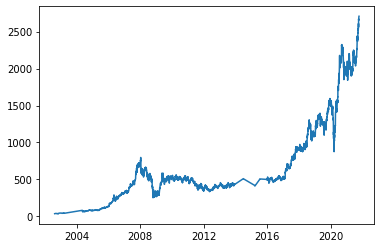

In [ ]:
plt.plot(df['RELIANCE.NS'])

In [ ]:
df

,BAJFINANCE.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,KOTAKBANK.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2002-08-12,4.614039,62.549999,20.980000,167.750000,24.427273,50.438282,8.015000,37.281265,21.861378,39.700001
2002-08-13,4.574204,61.896004,21.150000,173.350006,24.418180,50.452343,7.957500,37.528828,21.809484,39.162498
2002-08-14,4.538256,61.020000,20.830000,174.500000,24.054544,49.366405,8.002500,36.909920,21.691544,36.462502
2002-08-15,4.538256,12.204000,20.830000,174.500000,24.054544,49.366405,8.002500,36.909920,21.691544,36.462502
2002-08-16,4.645129,61.655998,21.030001,182.199997,24.400000,50.171875,8.020000,37.567509,21.686827,36.375000
...,...,...,...,...,...,...,...,...,...,...
2021-10-11,7817.100098,2749.250000,1633.800049,2645.100098,713.299988,1690.949951,1975.400024,2652.649902,469.250000,3685.600098
2021-10-12,7855.750000,2755.100098,1629.599976,2676.149902,708.599976,1685.150024,1995.099976,2667.800049,483.000000,3652.850098
2021-10-13,7929.299805,2765.600098,1639.400024,2646.750000,709.950012,1709.199951,2009.349976,2694.949951,481.700012,3655.199951


In [ ]:
df1 = df.reset_index()['BAJFINANCE.NS']

In [ ]:
df1

0          4.614039
1          4.574204
2          4.538256
3          4.538256
4          4.645129
           ...     
3975    7817.100098
3976    7855.750000
3977    7929.299805
3978    7862.899902
3979    7865.549805
Name: BAJFINANCE.NS, Length: 3980, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:

print(df1)

[[6.93878213e-05]
 [6.43614753e-05]
 [5.98256103e-05]
 ...
 [1.00000000e+00]
 [9.91621713e-01]
 [9.91956075e-01]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2587, 1393)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(2486, 100)
(2486,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1292, 100)
(1292,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 [==============================] - 13s 218ms/step - loss: 7.1788e-05 - val_loss: 0.0030
Epoch 2/100
39/39 [==============================] - 8s 195ms/step - loss: 1.0273e-05 - val_loss: 0.0035
Epoch 3/100
39/39 [==============================] - 7s 190ms/step - loss: 8.0081e-06 - val_loss: 0.0049
Epoch 4/100
39/39 [==============================] - 7s 189ms/step - loss: 7.4956e-06 - val_loss: 0.0021
Epoch 5/100
39/39 [==============================] - 7s 192ms/step - loss: 6.8796e-06 - val_loss: 0.0021
Epoch 6/100
39/39 [==============================] - 7s 190ms/step - loss: 6.8295e-06 - val_loss: 0.0021
Epoch 7/100
39/39 [==============================] - 8s 194ms/step - loss: 5.7053e-06 - val_loss: 0.0016
Epoch 8/100
39/39 [==============================] - 7s 188ms/step - loss: 5.7218e-06 - val_loss: 0.0043
Epoch 9/100
39/39 [==============================] - 7s 190ms/step - loss: 5.6500e-06 - val_loss: 0.0023
Epoch 10/100
39/39 [==============================] - 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

98.79083475591092

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3315.954008539997

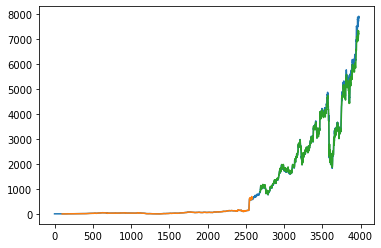

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1393

In [ ]:
x_input=test_data[1293:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.7276863440626701,
 0.7164627400442797,
 0.707447210640204,
 0.7096175177459785,
 0.7294086779961829,
 0.7324180645453668,
 0.7441338167827126,
 0.7557360200506625,
 0.7224625369719616,
 0.7256990214599375,
 0.7154911354607885,
 0.7674643409205406,
 0.7717039747952256,
 0.7810601511074892,
 0.776896237082716,
 0.7668587053431329,
 0.7629029746974096,
 0.7675463450867186,
 0.7711992579437379,
 0.7586822553824667,
 0.7585308772935867,
 0.7620638952540002,
 0.7661268289419095,
 0.7612373844431229,
 0.7631742476828955,
 0.7585624220968047,
 0.752417469785565,
 0.7562785660216342,
 0.7657357226707616,
 0.7821011296136825,
 0.7816216732491467,
 0.7714263558825298,
 0.7737417567609183,
 0.7754325458912131,
 0.7760318971523547,
 0.7734578535319564,
 0.7729279378044607,
 0.772391676149755,
 0.7585056168066348,
 0.7492251603442831,
 0.7812367896833211,
 0.7793882765369363,
 0.7770603070260158,
 0.7857666727141778,
 0.7896214230230372,
 0.8070467846428371,
 0.7853439600288681,
 0.78186140143141

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9203816]
101
1 day input [0.71646274 0.70744721 0.70961752 0.72940868 0.73241806 0.74413382
 0.75573602 0.72246254 0.72569902 0.71549114 0.76746434 0.77170397
 0.78106015 0.77689624 0.76685871 0.76290297 0.76754635 0.77119926
 0.75868226 0.75853088 0.7620639  0.76612683 0.76123738 0.76317425
 0.75856242 0.75241747 0.75627857 0.76573572 0.78210113 0.78162167
 0.77142636 0.77374176 0.77543255 0.7760319  0.77345785 0.77292794
 0.77239168 0.75850562 0.74922516 0.78123679 0.77938828 0.77706031
 0.78576667 0.78962142 0.80704678 0.78534396 0.7818614  0.79844134
 0.80187972 0.78788646 0.78486444 0.78093397 0.77802557 0.77773532
 0.78173522 0.7763158  0.80415095 0.80830858 0.82521659 0.83997956
 0.8514745  0.88023073 0.87579554 0.87415521 0.87852731 0.90362434
 0.94892268 0.94830441 0.94563574 0.94878387 0.94663254 0.94044341
 0.94118792 0.93708075 0.93896081 0.93542779 0.93499879 0.93466443
 0.9368473  0.9385697  0.98543265 0.9828838  0.99618308 0.98285226
 0.98311096 0.95129482 0.94777444 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

3980

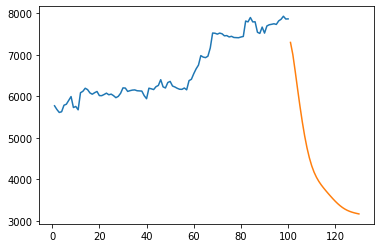

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[3880:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

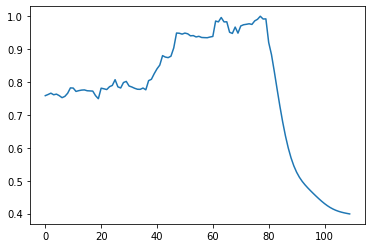

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3900:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

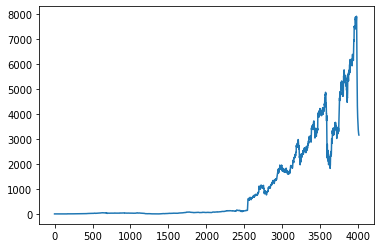

In [ ]:
plt.plot(df3)